<a href="https://colab.research.google.com/github/AshrayGattani/ml-task/blob/master/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**TASK 1**

In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_filmography(actor_name):
    title_list = []
    title_year = []
    # Format the actor's name to be used in the Rotten Tomatoes URL
    formatted_name = actor_name.lower().replace(" ", "_")

    # Construct the Rotten Tomatoes URL for the actor's filmography
    url = f"https://www.rottentomatoes.com/celebrity/{formatted_name}"

    # Send a GET request to the Rotten Tomatoes URL
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the section containing the filmography
    film_title = soup.find_all("td",class_="celebrity-filmography__title")
    film_year = soup.find_all("td",class_="celebrity-filmography__year")


    for td in film_title:
      td1 = td.text
      td2 = td1.strip("\n")
      title_list.append(td2)
    for y in film_year:
      y1 = y.text
      y2 = y1.strip("\n")
      title_year.append(y2)
    data = {'Year': title_year, 'Title': title_list}

    df = pd.DataFrame(data)
    print(df)

actor_name = input("Enter the name of the actor: ")

# Call the function to get the filmography
filmography = get_filmography(actor_name)


Enter the name of the actor: tom cruise
                    Year                                           Title
0                   2024  Mission: Impossible - Dead Reckoning, Part Two
1                   2023  Mission: Impossible - Dead Reckoning, Part One
2                   2022                               Top Gun: Maverick
3                   2018                   Mission: Impossible - Fallout
4                   2017                                   American Made
..                   ...                                             ...
61  2014-2015\n2017-2018          The Tonight Show Starring Jimmy Fallon
62       2004\n2013-2015                 The Daily Show With Jon Stewart
63             2011-2013                    Late Night With Jimmy Fallon
64                  2010                                        Top Gear
65                  2009                               The Jay Leno Show

[66 rows x 2 columns]


####**TASK 2**

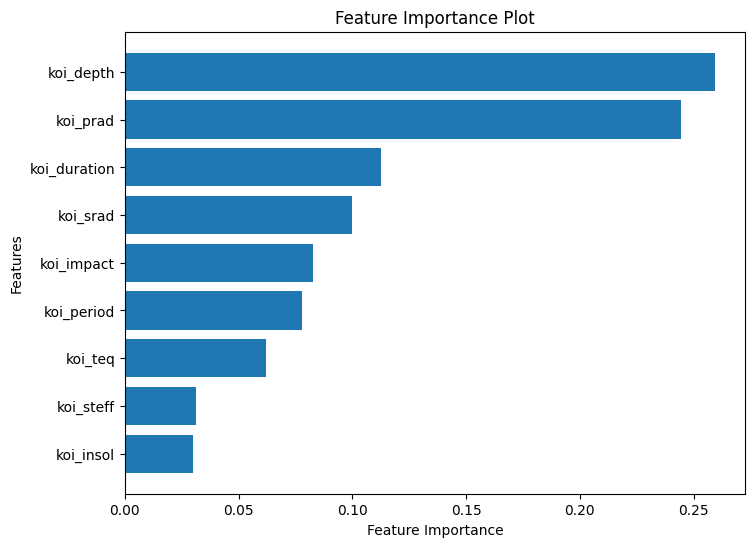

Top 3 most correlated features:
koi_depth
koi_prad
koi_duration


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Load the Kepler Data
kepler_data = pd.read_csv('/content/kepler_data.csv')

# Preprocessing
columns_to_remove = ['koi_teq_err1','koi_teq_err2']
# Remove the specified columns from the DataFrame
kepler_data = kepler_data.drop(columns=columns_to_remove)

kepler_data.dropna(inplace=True)

# Select relevant features and target variable
features = ['koi_period', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_steff', 'koi_srad','koi_impact','koi_insol']
target = 'koi_disposition'

X = kepler_data[features]
y = kepler_data[target]

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Calculate feature importances
feature_importances = model.feature_importances_


# Create a DataFrame with feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Create a dictionary of feature importances
feature_importance_dict = dict(zip(features, feature_importances))

# Sort the feature importances in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top 3 most important features
top_three_features = [feature for feature, importance in sorted_features[:3]]

print("Top 3 most correlated features:")
for feature in top_three_features:
    print(feature)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Encode the target variable
label_encoder = LabelEncoder()
kepler_data['koi_disposition_encoded'] = label_encoder.fit_transform(kepler_data['koi_disposition'])

# Select relevant features
features = ['koi_prad', 'koi_depth','koi_duration']

X = kepler_data[features]
y = kepler_data['koi_disposition_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Example prediction for a new data point
new_data_point = pd.DataFrame([[14.6, 10829, 0.0341]], columns=features)
predicted_class = label_encoder.inverse_transform(model.predict(new_data_point))
print('Predicted class:', predicted_class)


Accuracy: 0.9978586723768736
Predicted class: ['CONFIRMED']
